In [1]:
import transfer
from community import *
import  matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.animation as animation
import numpy as np
from datetime import datetime

# There is an option to set a file-name -- would highly recommend doing that.
date_time = datetime.now().strftime("%m_%d_%Y_%H:%M:%S")


In [2]:
""" simulate returns an animated 3d scatter plot of the community allIdeas object.
The input parameters are the community, the interaction coefficient gamma, 
and also fn, a string file-name which defaults to date and time."""
def simulate(c=None, gamma = 0.005, T = 80,fn=date_time):
    # seems like the same community is used again and again if I do not specify None case below.
    if c is None:
        c = community(300,3)
    fps = 40

    # Data to store c.allIdeas, to then make animation
    dataX = np.zeros((T*fps,c.numberMembers))
    dataY = np.zeros((T*fps,c.numberMembers))
    dataZ = np.zeros((T*fps,c.numberMembers))
    
#     posX = np.zeros((T*fps,c.numberMembers))
#     posY = np.zeros((T*fps,c.numberMembers))

    # Iterate the idea transfer throughout community
    for t in range(0,T+1):
        np.random.seed()
        dataX[t,:] = c.allIdeas[:,0]
        dataY[t,:] = c.allIdeas[:,1]
        dataZ[t,:] = c.allIdeas[:,2]
        
#         posX[t,:] = c.allPositions[:,0]
#         posY[t,:] = c.allPositions[:,1]
        #transfer.deterministicMerge(c, gamma/(t+1)**0.5)
        transfer.probabilisticMerge(c, gamma,t)

    # Plot results
    fig = plt.figure()
#   fig, (ax1, ax2) = plt.subplots(1,2)
    ax1 = fig.add_subplot(111,projection='3d')
    ax1.scatter3D(dataX[0], dataY[0], dataZ[0])
#     ax2.scatter(posX[0],posY[0])

    ax1Ticks = np.linspace(-c.domainSize,c.domainSize,4)
#     ax2Ticks = np.linspace(-2,2,4)

    #animation function for animation.FuncAnimation
    def update(ifrm,dataX,dataY,dataZ):
        ax1.clear()
        plt.autoscale(False)
        ax1.set_xticks(ax1Ticks)
        ax1.set_yticks(ax1Ticks)
        ax1.set_zticks(ax1Ticks)
        ax1.scatter3D(dataX[ifrm], dataY[ifrm], dataZ[ifrm])
        ax1.set_xlabel("frame: %d" % (ifrm))
        
#         ax2.clear()
#         ax2.set_xticks(ax2Ticks)
#         ax2.sety_ticks(ax2Ticks)
#         ax2.scatter(posX[ifrm],posY[ifrm])
#         ax2.set_xlabel("frame: %d" % (ifrm))

    ani = animation.FuncAnimation(fig, update, T, fargs=(dataX,dataY,dataZ),interval = T/fps )
    ani.save(fn+'.gif',writer='imagemagick',fps=fps)

    #plt.show()


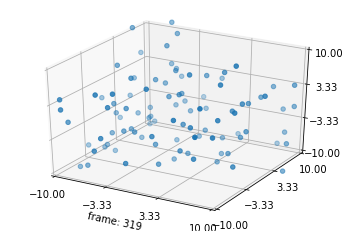

In [21]:
c = community(numberMembers=100,numberIdeas=3,domainSize=10)
simulate(c,gamma=0.05,T=320)

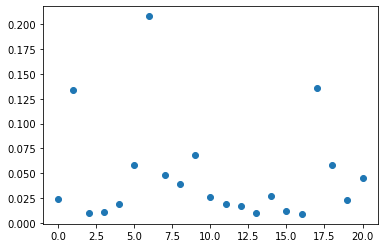

In [22]:
plt.plot(c.ideaDistribution[20][0],'o')
plt.show()

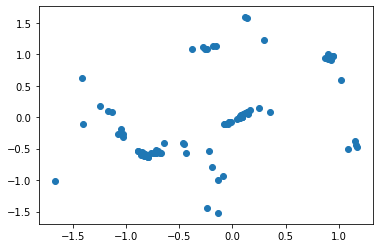

In [23]:
plt.scatter(c.allPositions[:,0],c.allPositions[:,1])

In [24]:
c.ideaDistribution

array([[[0.0378069 , 0.05681261, 0.0490636 , ..., 0.03511186,
         0.06392504, 0.02814209],
        [0.04805859, 0.05223529, 0.04243821, ..., 0.02670742,
         0.01882816, 0.07362391],
        [0.02215248, 0.07065199, 0.06786834, ..., 0.03274207,
         0.03553408, 0.02297347]],

       [[0.04115247, 0.04258631, 0.05690013, ..., 0.02845359,
         0.07628399, 0.02303103],
        [0.03542427, 0.0608682 , 0.0488787 , ..., 0.03003947,
         0.01896143, 0.05462376],
        [0.01866683, 0.08387788, 0.08286557, ..., 0.03760707,
         0.03922417, 0.0178809 ]],

       [[0.02230552, 0.13958921, 0.00664546, ..., 0.06054145,
         0.01878107, 0.04703314],
        [0.12741337, 0.00571184, 0.01084501, ..., 0.01111304,
         0.02317055, 0.18240492],
        [0.02811441, 0.00749932, 0.01295716, ..., 0.01177386,
         0.00394935, 0.04934711]],

       ...,

       [[0.04389491, 0.02711116, 0.06470046, ..., 0.02371793,
         0.0864479 , 0.01967984],
        [0.02065163, 

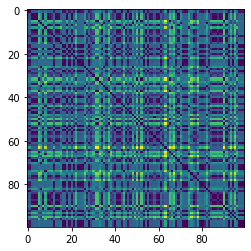

In [25]:
plt.imshow(c.distanceMatrix)

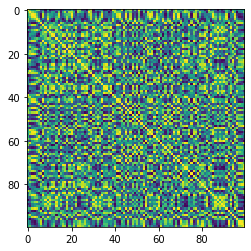

In [26]:
plt.imshow(c.agreementMatrix)

In [27]:
c.allPositions

array([[-7.67166203e-02, -1.08550682e-01],
       [-9.51353193e-03, -7.66618593e-02],
       [-7.14276518e-01, -5.62106313e-01],
       [-7.88507952e-01, -6.30417835e-01],
       [-7.13613984e-01, -5.74197032e-01],
       [ 8.71613701e-01,  9.44517943e-01],
       [-2.56969304e-01,  1.08573745e+00],
       [-8.18444223e-01, -5.93088233e-01],
       [ 1.15177393e+00, -3.78737064e-01],
       [-7.96795975e-01, -6.34526883e-01],
       [-8.90673084e-01, -5.30897081e-01],
       [-1.02369862e+00, -2.71249791e-01],
       [ 1.67139056e-01,  1.16819610e-01],
       [-8.15890215e-01, -6.11291259e-01],
       [-8.53341188e-01, -5.58021700e-01],
       [-1.24196007e+00,  1.74324556e-01],
       [ 1.22033999e-01,  6.22917475e-02],
       [ 8.00733540e-02,  3.12213179e-02],
       [-8.16526244e-01, -5.81691639e-01],
       [ 1.47299406e-01,  7.14452168e-02],
       [-7.16660302e-01, -5.25800784e-01],
       [ 1.44104676e-01,  5.03536571e-02],
       [ 1.01974319e+00,  5.92692777e-01],
       [ 4.

In [40]:
from scipy import cluster

In [41]:
centroids,loss = cluster.vq.kmeans(c.allPositions,4)
centroids

array([[ 0.19717066, -0.0436972 ],
       [-0.76250851, -0.55608622],
       [-0.23559198,  1.1665298 ],
       [ 0.92419737,  0.91514767]])

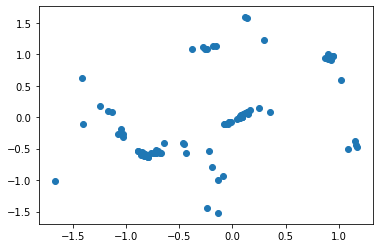

In [42]:
plt.scatter(c.allPositions[:,0],c.allPositions[:,1])

In [43]:
def closest_centroids(points,centroids):
    distances = np.sqrt(((points - centroids[:,np.newaxis])**2).sum(axis=2))
    return np.argmin(distances,axis=0)

In [44]:
idea0 = c.allIdeas[closest_centroids(c.allPositions, centroids)==3]

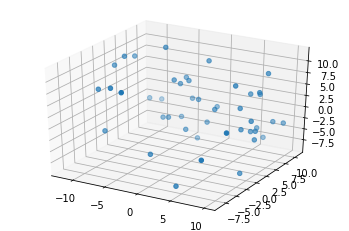

In [39]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter3D(idea0[:,0],idea0[:,1],idea0[:,2])
plt.show()

In [ ]:
c.ideaDistribution[closest_centroids(c.allPositions, centroids)==3